In [31]:

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
 


In [30]:
# Load dataset.
dftrain = pd.read_csv('/home/inlab/Downloads/trainINLAB.csv') # training data
dfeval = pd.read_csv('/home/inlab/Downloads/evalINLAB.csv') # testing data

dftrain.head()



,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime,HandoverResult
0,22.0,35.0,7.2500,100.0,29,0
1,38.0,54.0,71.2833,160.0,30,1
2,26.0,58.0,88.0000,165.0,48,1
3,35.0,55.0,53.1000,170.0,10,1
4,28.0,34.0,8.4583,80.0,26,0


In [29]:
y_train = dftrain
y_eval = dfeval
dftrain.head()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime
0,22.0,35.0,7.2500,100.0,29
1,38.0,54.0,71.2833,160.0,30
2,26.0,58.0,88.0000,165.0,48
3,35.0,55.0,53.1000,170.0,10
4,28.0,34.0,8.4583,80.0,26


In [32]:
dftrain.describe()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime,HandoverResult
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,29.523254,28.799841,34.513110,86.824561,26.570973,0.387560
std,12.036797,13.149571,54.629381,81.565142,14.767073,0.487582
min,0.750000,0.420000,0.000000,0.750000,1.000000,0.000000
25%,24.000000,22.000000,7.895800,28.000000,14.000000,0.000000
50%,28.000000,28.000000,15.050000,47.000000,27.000000,0.000000
75%,35.000000,34.000000,31.854150,130.000000,40.000000,1.000000
max,80.000000,74.000000,512.329200,825.000000,55.000000,1.000000


In [33]:
dftrain.shape


(627, 6)

In [34]:
y_train.head()

,CurrentAPSignal,NeighboringAPSignal,Mobility,BlockPropagationDelay,BlockReceivingTime
0,22.0,35.0,7.2500,100.0,29
1,38.0,54.0,71.2833,160.0,30
2,26.0,58.0,88.0000,165.0,48
3,35.0,55.0,53.1000,170.0,10
4,28.0,34.0,8.4583,80.0,26


<AxesSubplot:>

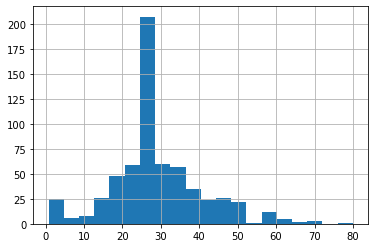

In [8]:
dftrain.CurrentAPSignal.hist(bins=20)

<AxesSubplot:>

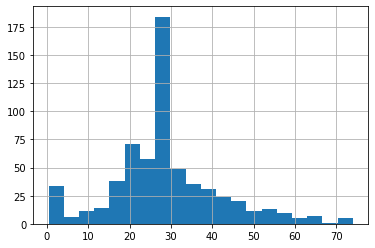

In [9]:
dftrain.NeighboringAPSignal.hist(bins=20)

<AxesSubplot:>

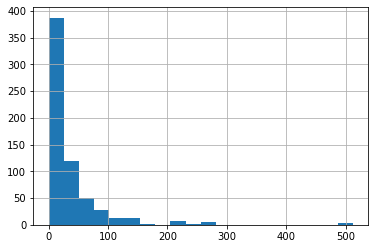

In [11]:
dftrain.Mobility.hist(bins=20)

<AxesSubplot:>

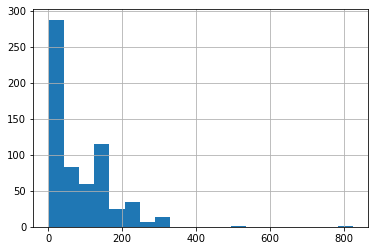

In [12]:
dftrain.BlockPropagationDelay.hist(bins=20)

<AxesSubplot:>

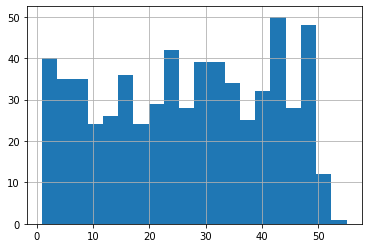

In [16]:
dftrain.BlockReceivingTime.hist(bins=20)

<AxesSubplot:>

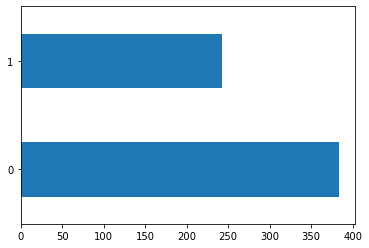

In [35]:
dftrain.HandoverResult.value_counts().plot(kind='barh')

Text(0.5, 0, '% HandoverResult leave')

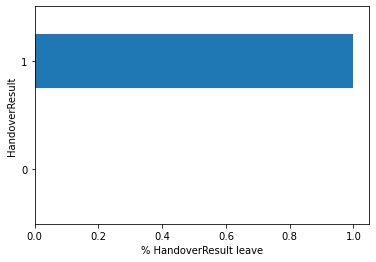

In [36]:
pd.concat([dftrain, y_train], axis=1).groupby('HandoverResult').HandoverResult.mean().plot(kind='barh').set_xlabel('% HandoverResult leave')

In [22]:

NUMERIC_COLUMNS = ['CurrentAPSignal','NeighboringAPSignal','Mobility','BlockPropagationDelay','BlockReceivingTime']

feature_columns = []


for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='CurrentAPSignal', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='NeighboringAPSignal', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Mobility', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BlockPropagationDelay', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='BlockReceivingTime', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [24]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [25]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx5a6pqt0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.5984849


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx5a6pqt0/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

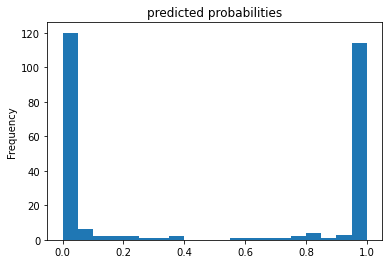

In [27]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')